In [1]:
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import time
import h5py
import kerastuner as kt

Using TensorFlow backend.


In [2]:
# (img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()
# 
# 
N_channels = 40
file_path = '/Users/jackkelly/Desktop/Building_Model/Data/40_channels_data_10000.csv'
df = pd.read_csv(file_path)
# dataset
dataset = df.values
# input power and channels statuses
X = dataset[0:10000,0:N_channels+1]
# channel SNRs
Y = dataset[0:10000,N_channels+1:2*N_channels+1]
# shuffle necessary because while shuffle=True in .fit() shuffles the data, it splits into different datasets first
X, Y = shuffle(X, Y)
# scaling between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
Y_scale = min_max_scaler.fit_transform(Y)
# X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y_scale, test_size=0.3)
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_scale, Y_scale, test_size=0.2)

In [3]:
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=N_channels+1))

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
#     hp_units1 = hp.Int('units1', min_value=10, max_value=300, step=2)
#     hp_units2 = hp.Int('units2', min_value=10, max_value=300, step=2)
#     model.add(keras.layers.Dense(units=hp_units1, activation='relu'))
#     model.add(keras.layers.Dense(units=hp_units2, activation='relu'))
#     model.add(keras.layers.Dense(N_channels, activation='sigmoid'))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(keras.layers.Dense(hp.Int(f'conv_{i}_units', min_value=32, max_value=320, step=1)))
    
    model.add(keras.layers.Dense(N_channels, activation='sigmoid'))
    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.MeanSquaredError(), metrics=['mean_squared_error'])

    return model

In [4]:
tuner = kt.Hyperband(model_builder,
                     objective=kt.Objective('mean_squared_error', 'min'),
                     max_epochs=10,
                     factor=3,
                     directory='/Users/jackkelly/Desktop/Building_Model/',
                     project_name='intro_to_kt_layers',
                     overwrite=True)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [5]:
tuner.search(X_train_and_val, Y_train_and_val, epochs=50, validation_split=0.25, callbacks=[stop_early], verbose=2)

Train on 6000 samples, validate on 2000 samples
Epoch 1/2
6000/6000 - 2s - loss: 0.1924 - mean_squared_error: 0.1924 - val_loss: 0.1798 - val_mean_squared_error: 0.1798
Epoch 2/2
6000/6000 - 1s - loss: 0.1717 - mean_squared_error: 0.1717 - val_loss: 0.1610 - val_mean_squared_error: 0.1610


Train on 6000 samples, validate on 2000 samples
Epoch 1/2
6000/6000 - 2s - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 2/2
6000/6000 - 1s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Train on 6000 samples, validate on 2000 samples
Epoch 1/2
6000/6000 - 1s - loss: 0.1857 - mean_squared_error: 0.1857 - val_loss: 0.1695 - val_mean_squared_error: 0.1695
Epoch 2/2
6000/6000 - 1s - loss: 0.1576 - mean_squared_error: 0.1576 - val_loss: 0.1434 - val_mean_squared_error: 0.1434


Train on 6000 samples, validate on 2000 samples
Epoch 1/2
6000/6000 - 2s - loss: 0.0559 - mean_squared_error: 0.0559 - val_loss: 0.0524 - val_mean_squared_error: 0.0524
Epoch 2/2
6000/6000 - 1s - loss: 0.0736 - mean_squared_error: 0.0736 - val_loss: 0.1819 - val_mean_squared_error: 0.1819


Train on 6000 samples, validate on 2000 samples
Epoch 1/2
6000/6000 - 2s - loss: 0.1071 - mean_squared_error: 0.1071 - val_loss: 0.3434 - val_mean_squared_error: 0.3434
Epoch 2/2
6000/6000 - 1s - loss: 0.3874 - mean_squared_error: 0.3874 - val_loss: 0.4197 - val_mean_squared_error: 0.4197


Train on 6000 samples, validate on 2000 samples
Epoch 1/2
6000/6000 - 2s - loss: 0.1631 - mean_squared_error: 0.1631 - val_loss: 0.1297 - val_mean_squared_error: 0.1297
Epoch 2/2
6000/6000 - 1s - loss: 0.1016 - mean_squared_error: 0.1016 - val_loss: 0.0787 - val_mean_squared_error: 0.0787


Train on 6000 samples, validate on 2000 samples
Epoch 1/2
6000/6000 - 2s - loss: 0.1660 - mean_squared_error: 0.1660 - val_loss: 0.1339 - val_mean_squared_error: 0.1339
Epoch 2/2
6000/6000 - 1s - loss: 0.1063 - mean_squared_error: 0.1063 - val_loss: 0.0805 - val_mean_squared_error: 0.0805


Train on 6000 samples, validate on 2000 samples
Epoch 1/2
6000/6000 - 1s - loss: 0.1183 - mean_squared_error: 0.1183 - val_loss: 0.0630 - val_mean_squared_error: 0.0630
Epoch 2/2
6000/6000 - 1s - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.0227 - val_mean_squared_error: 0.0227


Train on 6000 samples, validate on 2000 samples
Epoch 1/2
6000/6000 - 1s - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 4.9690e-04 - val_mean_squared_error: 4.9690e-04
Epoch 2/2
6000/6000 - 1s - loss: 5.9198e-04 - mean_squared_error: 5.9198e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011


Train on 6000 samples, validate on 2000 samples
Epoch 1/2
6000/6000 - 2s - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 2/2
6000/6000 - 1s - loss: 7.1454e-04 - mean_squared_error: 7.1454e-04 - val_loss: 6.5895e-04 - val_mean_squared_error: 6.5895e-04


Train on 6000 samples, validate on 2000 samples
Epoch 1/2
6000/6000 - 1s - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 2/2
6000/6000 - 1s - loss: 9.9023e-04 - mean_squared_error: 9.9023e-04 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Train on 6000 samples, validate on 2000 samples
Epoch 1/2
6000/6000 - 2s - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.2200 - val_mean_squared_error: 0.2200
Epoch 2/2
6000/6000 - 1s - loss: 0.4026 - mean_squared_error: 0.4026 - val_loss: 0.4220 - val_mean_squared_error: 0.4220


Train on 6000 samples, validate on 2000 samples
Epoch 3/4
6000/6000 - 1s - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 5.4054e-04 - val_mean_squared_error: 5.4054e-04
Epoch 4/4
6000/6000 - 1s - loss: 5.5519e-04 - mean_squared_error: 5.5519e-04 - val_loss: 4.7969e-04 - val_mean_squared_error: 4.7969e-04


Train on 6000 samples, validate on 2000 samples
Epoch 3/4
6000/6000 - 2s - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 4/4
6000/6000 - 1s - loss: 8.1569e-04 - mean_squared_error: 8.1569e-04 - val_loss: 4.3033e-04 - val_mean_squared_error: 4.3033e-04


Train on 6000 samples, validate on 2000 samples
Epoch 3/4
6000/6000 - 1s - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 4/4
6000/6000 - 1s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Train on 6000 samples, validate on 2000 samples
Epoch 3/4
6000/6000 - 1s - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 6.2242e-04 - val_mean_squared_error: 6.2242e-04
Epoch 4/4
6000/6000 - 1s - loss: 9.6395e-04 - mean_squared_error: 9.6395e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012


Train on 6000 samples, validate on 2000 samples
Epoch 5/10
6000/6000 - 1s - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 4.8880e-04 - val_mean_squared_error: 4.8880e-04
Epoch 6/10
6000/6000 - 1s - loss: 6.5774e-04 - mean_squared_error: 6.5774e-04 - val_loss: 4.6659e-04 - val_mean_squared_error: 4.6659e-04
Epoch 7/10
6000/6000 - 1s - loss: 6.0595e-04 - mean_squared_error: 6.0595e-04 - val_loss: 5.4360e-04 - val_mean_squared_error: 5.4360e-04
Epoch 8/10
6000/6000 - 1s - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 9/10
6000/6000 - 1s - loss: 5.9794e-04 - mean_squared_error: 5.9794e-04 - val_loss: 4.6284e-04 - val_mean_squared_error: 4.6284e-04
Epoch 10/10
6000/6000 - 1s - loss: 7.3424e-04 - mean_squared_error: 7.3424e-04 - val_loss: 7.7968e-04 - val_mean_squared_error: 7.7968e-04


Train on 6000 samples, validate on 2000 samples
Epoch 5/10
6000/6000 - 2s - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 6/10
6000/6000 - 1s - loss: 7.0235e-04 - mean_squared_error: 7.0235e-04 - val_loss: 4.5970e-04 - val_mean_squared_error: 4.5970e-04
Epoch 7/10
6000/6000 - 1s - loss: 5.4664e-04 - mean_squared_error: 5.4664e-04 - val_loss: 4.3679e-04 - val_mean_squared_error: 4.3679e-04
Epoch 8/10
6000/6000 - 1s - loss: 5.8684e-04 - mean_squared_error: 5.8684e-04 - val_loss: 4.5317e-04 - val_mean_squared_error: 4.5317e-04
Epoch 9/10
6000/6000 - 1s - loss: 4.9831e-04 - mean_squared_error: 4.9831e-04 - val_loss: 7.3855e-04 - val_mean_squared_error: 7.3855e-04
Epoch 10/10
6000/6000 - 1s - loss: 5.1779e-04 - mean_squared_error: 5.1779e-04 - val_loss: 4.2711e-04 - val_mean_squared_error: 4.2711e-04


Train on 6000 samples, validate on 2000 samples
Epoch 1/4
6000/6000 - 1s - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 2/4
6000/6000 - 1s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 6.1524e-04 - val_mean_squared_error: 6.1524e-04
Epoch 3/4
6000/6000 - 1s - loss: 5.5459e-04 - mean_squared_error: 5.5459e-04 - val_loss: 4.2482e-04 - val_mean_squared_error: 4.2482e-04
Epoch 4/4
6000/6000 - 1s - loss: 5.3087e-04 - mean_squared_error: 5.3087e-04 - val_loss: 3.8265e-04 - val_mean_squared_error: 3.8265e-04


Train on 6000 samples, validate on 2000 samples
Epoch 1/4
6000/6000 - 1s - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 4.7942e-04 - val_mean_squared_error: 4.7942e-04
Epoch 2/4
6000/6000 - 1s - loss: 6.7367e-04 - mean_squared_error: 6.7367e-04 - val_loss: 8.1340e-04 - val_mean_squared_error: 8.1340e-04
Epoch 3/4
6000/6000 - 1s - loss: 5.3678e-04 - mean_squared_error: 5.3678e-04 - val_loss: 5.5510e-04 - val_mean_squared_error: 5.5510e-04
Epoch 4/4
6000/6000 - 1s - loss: 5.5944e-04 - mean_squared_error: 5.5944e-04 - val_loss: 7.0644e-04 - val_mean_squared_error: 7.0644e-04


Train on 6000 samples, validate on 2000 samples
Epoch 1/4
6000/6000 - 2s - loss: 0.1556 - mean_squared_error: 0.1556 - val_loss: 0.1103 - val_mean_squared_error: 0.1103
Epoch 2/4
6000/6000 - 1s - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.0566 - val_mean_squared_error: 0.0566
Epoch 3/4
6000/6000 - 1s - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.0311 - val_mean_squared_error: 0.0311
Epoch 4/4
6000/6000 - 1s - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0160 - val_mean_squared_error: 0.0160


Train on 6000 samples, validate on 2000 samples
Epoch 1/4
6000/6000 - 2s - loss: 0.1519 - mean_squared_error: 0.1519 - val_loss: 0.1079 - val_mean_squared_error: 0.1079
Epoch 2/4
6000/6000 - 1s - loss: 0.0815 - mean_squared_error: 0.0815 - val_loss: 0.0608 - val_mean_squared_error: 0.0608
Epoch 3/4
6000/6000 - 1s - loss: 0.0469 - mean_squared_error: 0.0469 - val_loss: 0.0349 - val_mean_squared_error: 0.0349
Epoch 4/4
6000/6000 - 1s - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0192 - val_mean_squared_error: 0.0192


Train on 6000 samples, validate on 2000 samples
Epoch 1/4
6000/6000 - 1s - loss: 0.1313 - mean_squared_error: 0.1313 - val_loss: 0.0722 - val_mean_squared_error: 0.0722
Epoch 2/4
6000/6000 - 1s - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 3/4
6000/6000 - 1s - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 4/4
6000/6000 - 1s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0034 - val_mean_squared_error: 0.0034


Train on 6000 samples, validate on 2000 samples
Epoch 1/4
6000/6000 - 2s - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 6.1097e-04 - val_mean_squared_error: 6.1097e-04
Epoch 2/4
6000/6000 - 1s - loss: 5.1534e-04 - mean_squared_error: 5.1534e-04 - val_loss: 4.3319e-04 - val_mean_squared_error: 4.3319e-04
Epoch 3/4
6000/6000 - 1s - loss: 5.1352e-04 - mean_squared_error: 5.1352e-04 - val_loss: 5.3761e-04 - val_mean_squared_error: 5.3761e-04
Epoch 4/4
6000/6000 - 1s - loss: 5.7630e-04 - mean_squared_error: 5.7630e-04 - val_loss: 5.9374e-04 - val_mean_squared_error: 5.9374e-04


Train on 6000 samples, validate on 2000 samples
Epoch 5/10
6000/6000 - 2s - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 5.1337e-04 - val_mean_squared_error: 5.1337e-04
Epoch 6/10
6000/6000 - 1s - loss: 6.5951e-04 - mean_squared_error: 6.5951e-04 - val_loss: 5.3831e-04 - val_mean_squared_error: 5.3831e-04
Epoch 7/10
6000/6000 - 1s - loss: 5.5703e-04 - mean_squared_error: 5.5703e-04 - val_loss: 6.8457e-04 - val_mean_squared_error: 6.8457e-04
Epoch 8/10
6000/6000 - 1s - loss: 7.0271e-04 - mean_squared_error: 7.0271e-04 - val_loss: 5.6785e-04 - val_mean_squared_error: 5.6785e-04
Epoch 9/10
6000/6000 - 1s - loss: 5.8808e-04 - mean_squared_error: 5.8808e-04 - val_loss: 6.0753e-04 - val_mean_squared_error: 6.0753e-04
Epoch 10/10
6000/6000 - 1s - loss: 5.8997e-04 - mean_squared_error: 5.8997e-04 - val_loss: 5.2383e-04 - val_mean_squared_error: 5.2383e-04


Train on 6000 samples, validate on 2000 samples
Epoch 5/10
6000/6000 - 1s - loss: 0.0494 - mean_squared_error: 0.0494 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 6/10
6000/6000 - 1s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 6.3875e-04 - val_mean_squared_error: 6.3875e-04
Epoch 7/10
6000/6000 - 1s - loss: 5.5924e-04 - mean_squared_error: 5.5924e-04 - val_loss: 4.9370e-04 - val_mean_squared_error: 4.9370e-04
Epoch 8/10
6000/6000 - 1s - loss: 4.9657e-04 - mean_squared_error: 4.9657e-04 - val_loss: 4.4562e-04 - val_mean_squared_error: 4.4562e-04
Epoch 9/10
6000/6000 - 1s - loss: 4.3417e-04 - mean_squared_error: 4.3417e-04 - val_loss: 5.5475e-04 - val_mean_squared_error: 5.5475e-04
Epoch 10/10
6000/6000 - 1s - loss: 4.2783e-04 - mean_squared_error: 4.2783e-04 - val_loss: 3.4764e-04 - val_mean_squared_error: 3.4764e-04


Train on 6000 samples, validate on 2000 samples
Epoch 1/10
6000/6000 - 1s - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 4.6064e-04 - val_mean_squared_error: 4.6064e-04
Epoch 2/10
6000/6000 - 1s - loss: 6.8172e-04 - mean_squared_error: 6.8172e-04 - val_loss: 6.0057e-04 - val_mean_squared_error: 6.0057e-04
Epoch 3/10
6000/6000 - 1s - loss: 7.8964e-04 - mean_squared_error: 7.8964e-04 - val_loss: 7.4148e-04 - val_mean_squared_error: 7.4148e-04
Epoch 4/10
6000/6000 - 1s - loss: 8.0658e-04 - mean_squared_error: 8.0658e-04 - val_loss: 5.1194e-04 - val_mean_squared_error: 5.1194e-04
Epoch 5/10
6000/6000 - 1s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 6.5943e-04 - val_mean_squared_error: 6.5943e-04
Epoch 6/10
6000/6000 - 1s - loss: 7.0712e-04 - mean_squared_error: 7.0712e-04 - val_loss: 4.7518e-04 - val_mean_squared_error: 4.7518e-04


Train on 6000 samples, validate on 2000 samples
Epoch 1/10
6000/6000 - 1s - loss: 0.1921 - mean_squared_error: 0.1921 - val_loss: 0.1797 - val_mean_squared_error: 0.1797
Epoch 2/10
6000/6000 - 1s - loss: 0.1715 - mean_squared_error: 0.1715 - val_loss: 0.1624 - val_mean_squared_error: 0.1624
Epoch 3/10
6000/6000 - 1s - loss: 0.1545 - mean_squared_error: 0.1545 - val_loss: 0.1458 - val_mean_squared_error: 0.1458
Epoch 4/10
6000/6000 - 1s - loss: 0.1377 - mean_squared_error: 0.1377 - val_loss: 0.1293 - val_mean_squared_error: 0.1293
Epoch 5/10
6000/6000 - 1s - loss: 0.1212 - mean_squared_error: 0.1212 - val_loss: 0.1132 - val_mean_squared_error: 0.1132
Epoch 6/10
6000/6000 - 1s - loss: 0.1054 - mean_squared_error: 0.1054 - val_loss: 0.0982 - val_mean_squared_error: 0.0982
Epoch 7/10
6000/6000 - 1s - loss: 0.0911 - mean_squared_error: 0.0911 - val_loss: 0.0847 - val_mean_squared_error: 0.0847
Epoch 8/10
6000/6000 - 1s - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.0731 - val_mea

Train on 6000 samples, validate on 2000 samples
Epoch 1/10
6000/6000 - 1s - loss: 0.0581 - mean_squared_error: 0.0581 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 2/10
6000/6000 - 1s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 8.5226e-04 - val_mean_squared_error: 8.5226e-04
Epoch 3/10
6000/6000 - 1s - loss: 5.8940e-04 - mean_squared_error: 5.8940e-04 - val_loss: 4.5447e-04 - val_mean_squared_error: 4.5447e-04
Epoch 4/10
6000/6000 - 1s - loss: 4.3952e-04 - mean_squared_error: 4.3952e-04 - val_loss: 4.0101e-04 - val_mean_squared_error: 4.0101e-04
Epoch 5/10
6000/6000 - 1s - loss: 4.5872e-04 - mean_squared_error: 4.5872e-04 - val_loss: 4.0333e-04 - val_mean_squared_error: 4.0333e-04
Epoch 6/10
6000/6000 - 1s - loss: 4.7812e-04 - mean_squared_error: 4.7812e-04 - val_loss: 3.5832e-04 - val_mean_squared_error: 3.5832e-04
Epoch 7/10
6000/6000 - 1s - loss: 4.1593e-04 - mean_squared_error: 4.1593e-04 - val_loss: 3.8278e-04 - val_mean_squared_error: 3.8278e-04
Epoch 8/10

Train on 6000 samples, validate on 2000 samples
Epoch 1/10
6000/6000 - 1s - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 2/10
6000/6000 - 0s - loss: 7.9032e-04 - mean_squared_error: 7.9032e-04 - val_loss: 5.3504e-04 - val_mean_squared_error: 5.3504e-04
Epoch 3/10
6000/6000 - 0s - loss: 4.9834e-04 - mean_squared_error: 4.9834e-04 - val_loss: 8.3877e-04 - val_mean_squared_error: 8.3877e-04
Epoch 4/10
6000/6000 - 0s - loss: 5.5990e-04 - mean_squared_error: 5.5990e-04 - val_loss: 5.2921e-04 - val_mean_squared_error: 5.2921e-04
Epoch 5/10
6000/6000 - 0s - loss: 5.9852e-04 - mean_squared_error: 5.9852e-04 - val_loss: 5.3075e-04 - val_mean_squared_error: 5.3075e-04
Epoch 6/10
6000/6000 - 0s - loss: 5.1726e-04 - mean_squared_error: 5.1726e-04 - val_loss: 4.7054e-04 - val_mean_squared_error: 4.7054e-04
Epoch 7/10
6000/6000 - 0s - loss: 4.7702e-04 - mean_squared_error: 4.7702e-04 - val_loss: 3.4666e-04 - val_mean_squared_error: 3.4666e-04
Ep

INFO:tensorflow:Oracle triggered exit


In [6]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [7]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_and_val, Y_train_and_val, epochs=25, validation_split=0.25, verbose=0)

mean_squared_error_per_epoch = history.history['mean_squared_error']
best_epoch = mean_squared_error_per_epoch.index(min(mean_squared_error_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 7


In [8]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train_and_val, Y_train_and_val, epochs=best_epoch, validation_split=0.25, verbose=0)

In [9]:
eval_result = hypermodel.evaluate(X_test, Y_test)
print(eval_result)
# print("[test loss, test accuracy]:", eval_result)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 0s 49us/sample - loss: 4.9642e-04 - mean_squared_error: 4.0727e-04
[0.0004072651290334761, 0.00040726515]


In [10]:
file_path = '/Users/jackkelly/Desktop/Building_Model/Data/40_channels_data_fewchannels_10000.csv'
df = pd.read_csv(file_path)
# dataset
dataset = df.values
# input power and channels statuses
X = dataset[0:10000,0:N_channels+1]
# channel SNRs
Y = dataset[0:10000,N_channels+1:2*N_channels+1]
# shuffle necessary because while shuffle=True in .fit() shuffles the data, it splits into different datasets first
X, Y = shuffle(X, Y)
# scaling between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
Y_scale = min_max_scaler.fit_transform(Y)
test_mse = (hypermodel.evaluate(X_scale, Y_scale, verbose=2))
print(test_mse)

10000/1 - 0s - loss: 3.1810e-04 - mean_squared_error: 2.2164e-04
[0.0002216373372823, 0.00022163737]


In [11]:
# for key, value in history.history.items():
#     print(key)

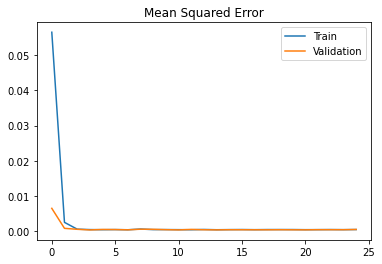

In [12]:
def visualising_data(hist):
    plt.title('Mean Squared Error')
    plt.plot(history.history['mean_squared_error'], label='Train')
    plt.plot(history.history['val_mean_squared_error'], label='Validation')
    plt.legend()
    plt.show()
visualising_data(history)

In [13]:
# 3.9206e-04
hypermodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 90)                3780      
_________________________________________________________________
dense_1 (Dense)              (None, 156)               14196     
_________________________________________________________________
dense_2 (Dense)              (None, 129)               20253     
_________________________________________________________________
dense_3 (Dense)              (None, 40)                5200      
Total params: 43,429
Trainable params: 43,429
Non-trainable params: 0
_________________________________________________________________


In [14]:
# shows weights of the ANN
# hypermodel.weights
hypermodel.summary()
# print(hypermodel.metrics_names)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 90)                3780      
_________________________________________________________________
dense_1 (Dense)              (None, 156)               14196     
_________________________________________________________________
dense_2 (Dense)              (None, 129)               20253     
_________________________________________________________________
dense_3 (Dense)              (None, 40)                5200      
Total params: 43,429
Trainable params: 43,429
Non-trainable params: 0
_________________________________________________________________
